In [ ]:
# installation xgboost
#! pip install xgboost

# Importation des librairies

In [ ]:
# librairies usuelles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time
# preprocessing pour modèles utilisant les distances
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# métriques d'évaluation des modèles
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, fbeta_score

# 
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

# classificateur (modèle)
import lightgbm
import xgboost
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Importation des données

In [ ]:
path = r"D:\DESKTOP IMPORTANT\Recherche d'emploi\OPENCLASSROOM\PROJET 7 Implémentez un modèle de scoring\Projet+Mise+en+prod+-+home-credit-default-risk\fichiers de travail\dataset_to_train_model_fill.csv"

In [ ]:
train_df = pd.read_csv(path)
train_df

,Unnamed: 0,index,TARGET,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,0,1.0,100002,0.0,0.0,0.0,0.0,202500.0,406597.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1,1,0.0,100003,1.0,0.0,1.0,0.0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,2,2,0.0,100004,0.0,1.0,0.0,0.0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,3,3,0.0,100006,1.0,0.0,0.0,0.0,135000.0,312682.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,4,0.0,100007,0.0,0.0,0.0,0.0,121500.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,307502,307506,0.0,456251,0.0,0.0,1.0,0.0,157500.0,254700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,307503,307507,0.0,456252,1.0,0.0,0.0,0.0,72000.0,269550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,307504,307508,0.0,456253,1.0,0.0,0.0,0.0,153000.0,677664.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,307505,307509,1.0,456254,1.0,0.0,0.0,0.0,171000.0,370107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
train_df = train_df.drop("Unnamed: 0", axis=1)
train_df

,index,TARGET,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,1.0,100002,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1,0.0,100003,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,2,0.0,100004,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,3,0.0,100006,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,0.0,100007,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,307506,0.0,456251,0.0,0.0,1.0,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,307507,0.0,456252,1.0,0.0,0.0,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,307508,0.0,456253,1.0,0.0,0.0,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,307509,1.0,456254,1.0,0.0,0.0,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
train_df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
train_df.TARGET =  train_df.TARGET.astype('int64')

In [ ]:
train_df.dtypes

index                                 int64
TARGET                                int64
SK_ID_CURR                            int64
CODE_GENDER                         float64
FLAG_OWN_CAR                        float64
                                     ...   
CC_NAME_CONTRACT_STATUS_nan_MAX     float64
CC_NAME_CONTRACT_STATUS_nan_MEAN    float64
CC_NAME_CONTRACT_STATUS_nan_SUM     float64
CC_NAME_CONTRACT_STATUS_nan_VAR     float64
CC_COUNT                            float64
Length: 798, dtype: object

In [ ]:
train_df

,index,TARGET,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,1,100002,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1,0,100003,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,2,0,100004,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,3,0,100006,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,0,100007,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,307506,0,456251,0.0,0.0,1.0,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,307507,0,456252,1.0,0.0,0.0,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,307508,0,456253,1.0,0.0,0.0,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,307509,1,456254,1.0,0.0,0.0,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


# Séparation des variables explicatives de la variable dépendante

In [ ]:
# ressotir uniquement les variables explicatives et dépendante
feat = [f for f in train_df.columns if f not in ["index", "SK_ID_CURR"]]

In [ ]:
train_dff = train_df[feat]
train_dff

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,1,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,0,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,0,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0.0,0.0,1.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,0,1.0,0.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,0,1.0,0.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,1,1.0,0.0,0.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
import re 

In [ ]:
train_dff = train_dff.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train_dff

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,1,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,0,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,0,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0.0,0.0,1.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,0,1.0,0.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,0,1.0,0.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,1,1.0,0.0,0.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
train_dff.iloc[:, 0]

0         1
1         0
2         0
3         0
4         0
         ..
307502    0
307503    0
307504    0
307505    1
307506    0
Name: TARGET, Length: 307507, dtype: int64

In [ ]:
train_dff.TARGET

0         1
1         0
2         0
3         0
4         0
         ..
307502    0
307503    0
307504    0
307505    1
307506    0
Name: TARGET, Length: 307507, dtype: int64

In [ ]:
X = train_dff.iloc[:, 1:].copy()
y = train_dff.TARGET.copy()

In [ ]:
# partitionnement des données de sorte à respecter le ratio TARGET (entre 0 et 1) et choix de X profil aléatoire
def train_dff_portion(num_rows):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_rows, random_state=0, shuffle=True , stratify=y)
    del X_test, y_test
    
    return X_train, y_train

In [ ]:
Xp, yp = train_dff_portion(20000)

In [ ]:
print("Xp size", Xp.shape)
print ("yp size", yp.shape)

Xp size (20000, 795)
yp size (20000,)


In [ ]:
# préparation de train_set et test_set
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=0, shuffle=True , stratify=yp)

In [ ]:
print("X_train size", X_train.shape)
print ("X_test size", X_test.shape)

X_train size (16000, 795)
X_test size (4000, 795)


In [ ]:
np.bincount(y_train)/y_train.shape[0], np.bincount(y_test)/y_test.shape[0]

(array([0.91925, 0.08075]), array([0.91925, 0.08075]))

Les proportions de y dans le train set comme dans le test set sont garanties

# Définition des hyperparamètres des modèles et courbes roc des modèles sus-cités



In [ ]:
model_dummy = DummyClassifier()
param_dummy = {}

model_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_knn = {'n_neighbors': np.arange(2, 10),'metric':['euclidean',"manhattan"]}

model_lgbm = LGBMClassifier()
param_lgbm = {'num_leaves': [31, 127],
              'reg_alpha': [0.1, 0.5],
              "learning_rate": [0.001,0.01,0.1], "max_depth" : np.arange(2,10)}


model_svm = make_pipeline(StandardScaler(),  SVC())
param_svm = {"C": [0.001, 0.01, 0.1, 1.0],
             "gamma": np.arange(0.1, 1, 0.3)}

model_mlp = MLPClassifier()
param_mlp = {"learning_rate_init" : [0.001, 0.01, 0.1, 1],
             "solver": ["lbfgs", "sgd", "adam"],
             "activation" :  ["logistic", "relu"]
            }
model_gb = GradientBoostingClassifier()
param_gb = {"learning_rate":[0.001,0.01,0.1],"max_depth":np.arange(3, 10, 2)}

model_xgb = XGBClassifier()
param_xgb = {"eta":[0.01, 0.1,1],
             'gamma': [0.5, 1, 1.5, 2, 5],
             'max_depth': [3, 4, 5, 7, 9]
            }

model_rf = make_pipeline(StandardScaler(), RandomForestClassifier())
param_rf = {"max_depth":np.arange(2, 10, 2),
            "n_estimators" : [100, 200]
           }

model_logr = make_pipeline(StandardScaler(), LogisticRegression())
param_logr = {"C": [0.001, 0.01, 0.1, 1.0, 10],
              "solver" : ['lbfgs', 'sag', 'saga', 'newton-cg'],
              "max_iter" : [100, 300]}


**Comparaison des modèles par rapport à la baseline DummyClassifier**

**cas de dummyClassifier**

In [ ]:
model_dummy.fit(X_train, y_train)
model_dummy.score(X_test, y_test)

0.91925

In [ ]:
from sklearn.metrics import r2_score, plot_roc_curve, roc_curve, RocCurveDisplay # plot_roc_curve sera dépréciée

In [ ]:
model_dummy.predict_proba(X_test)

array([[0.91925, 0.08075],
       [0.91925, 0.08075],
       [0.91925, 0.08075],
       ...,
       [0.91925, 0.08075],
       [0.91925, 0.08075],
       [0.91925, 0.08075]])

In [ ]:
roc_auc_score(y_test, model_dummy.predict_proba(X_test)[:, 1])

0.5

In [ ]:
model_dummy.predict_proba(X_test)[:, 1]

array([0.08075, 0.08075, 0.08075, ..., 0.08075, 0.08075, 0.08075])

**cas de KneighborsClassifier**

In [ ]:
y_test

66385     0
30078     0
90240     1
243249    0
139606    0
         ..
220128    0
120655    0
243366    1
83284     1
267145    0
Name: TARGET, Length: 4000, dtype: int64

In [ ]:
model_knn.fit(X_train, y_train)
model_knn.score(X_test, y_test)

0.91375

In [ ]:
model_knn.predict_proba(X_test)[:, 1]

array([0.4, 0.2, 0. , ..., 0.2, 0.2, 0. ])

On voit très bien que pour le premier index c'est à  dire 66385 la probabilité de défaut de paiement basse est donné 0  donc bien prédite ce qui n'est pas le cas avec les profils 243366 et 83284 qui sont classés comme en défaut de paiement alors que la probabilité de défaut de paiement est très basse : ce sont des erreurs de prédictions evaluables en calulant l'Aire sous la courbe ROC.

In [ ]:
roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])

0.5639402662858654

**cas de tous les modèles étudiés**

In [ ]:
# https://runebook.dev/fr/docs/scikit_learn/auto_examples/model_selection/plot_det#sphx-glr-auto-examples-model-selection-plot-det-py
classifiers = {
    "Dummy": model_dummy,
    "KNeighbors": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "LGBM": LGBMClassifier(),
    #"GaussianProcess" : make_pipeline(StandardScaler(), GaussianProcessClassifier()),
    "SVC": make_pipeline(StandardScaler(),  SVC()),
    "MLP": MLPClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGB": XGBClassifier(),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": make_pipeline(StandardScaler(), LogisticRegression()), 
}

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


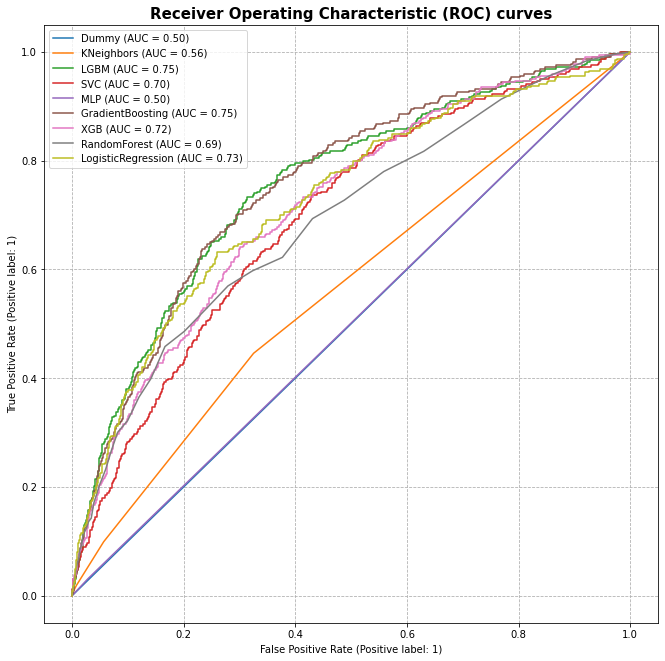

In [ ]:
fig, ax_roc = plt.subplots(1, figsize=(11, 11))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves', fontsize=15, fontweight="bold")
ax_roc.grid(linestyle='--')

plt.legend()
plt.show()

Enormément (une trentaine de minutes pour éxécuter le modèle Knn)

Les modèles sont en général plus performants que le modèle le plus DummyClassifier dont la courbe n'est significative sur . 

XGBClassifier, LGBMClassifier, GradientBoostingClassifier, SVC, RandomForestClassifier, LogisticRegression sont en tête dans la prédiction sur le jeu de test avec des AUC supérieures à 0.70.

KneighborsClassifier, MLPClassifier sont légèrement au-dessus de 0.50 donc des capacités moins bien discriminatoires.
Cependant les hyperparamètres par défauts conduisent à des résultats de prédiction moins satisfaisants.

### Optimisation d'hyperparamètres via  RandomizedSearchCV (recherche plus rapide des hyperparamètres contrairement à GridSearchCV)

In [ ]:
Liste_model = [model_dummy, model_mlp, model_lgbm, model_svm, model_gb, model_xgb, model_rf, model_logr, model_knn]

In [ ]:
# score AUC de la courbe ROC et f1_score avec GridSearchCV
cv = StratifiedKFold(5, shuffle=True, random_state=0) # utiliser à cause du jeu de données déséquilibré.
scoring = "roc_auc"

rs_mlp = GridSearchCV(MLPClassifier(max_iter = 300), param_mlp, cv=cv, scoring=scoring) # GridSearchCV demandé lors de l'exécution avec le modèle MLP
rs_lgbm = RandomizedSearchCV(model_lgbm, param_lgbm, cv=cv, scoring=scoring)
rs_gb = RandomizedSearchCV(model_gb, param_gb, cv=cv, scoring=scoring)
rs_xgb = RandomizedSearchCV(model_xgb, param_xgb, cv=cv, scoring=scoring)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_rf, cv=cv, scoring=scoring)
rs_logr = RandomizedSearchCV(LogisticRegression(max_iter = 300), param_logr, cv=cv, scoring=scoring)
rs_knn = RandomizedSearchCV(KNeighborsClassifier(), param_knn, cv=cv, scoring=scoring)

Nous mettons de côté le modèle svm car met énormémement de temps sans pour autant converger.
Pour les modèles basés sur la distance, leurs variables explicatives sont standardisées

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
rs_logr.fit(X_train_scaled, y_train)
rs_knn.fit(X_train_scaled, y_train)
rs_mlp.fit(X_train_scaled, y_train)
rs_rf.fit(X_train, y_train)
rs_lgbm.fit(X_train, y_train)
rs_gb.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interac...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'eta': [0.01, 0.1, 1],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5, 7, 9]},
                   scoring='roc_auc')

In [ ]:
# recommandation Increase the number of iterations (max_iter) or scale the data as shown in: https://scikit-learn.org/stable/modules/preprocessing.html
# pour MLP il est recommandé de standardiser les données

In [ ]:
df_gb = pd.DataFrame(rs_gb.cv_results_)
df_gb = df_gb[df_gb.rank_test_score == 1][["mean_fit_time", "mean_score_time"]]

In [ ]:
pd.DataFrame(rs_gb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,163.249575,2.492044,0.043497,0.006132,7,0.001,"{'max_depth': 7, 'learning_rate': 0.001}",0.700136,0.710391,0.680740,0.692782,0.653398,0.687489,0.019597,8
1,123.189849,7.912215,0.044490,0.019600,5,0.001,"{'max_depth': 5, 'learning_rate': 0.001}",0.698341,0.699694,0.690098,0.697672,0.671067,0.691374,0.010690,7
2,69.442233,2.091168,0.049682,0.024471,3,0.01,"{'max_depth': 3, 'learning_rate': 0.01}",0.714158,0.712161,0.712792,0.720081,0.693019,0.710442,0.009152,5
3,71.323563,2.868160,0.031254,0.000016,3,0.1,"{'max_depth': 3, 'learning_rate': 0.1}",0.745880,0.735644,0.740165,0.752151,0.720338,0.738836,0.010780,1
4,186.008160,20.874061,0.060055,0.013046,7,0.01,"{'max_depth': 7, 'learning_rate': 0.01}",0.726767,0.728060,0.713951,0.725619,0.691285,0.717136,0.013874,3
5,239.531265,10.954842,0.061698,0.008585,9,0.1,"{'max_depth': 9, 'learning_rate': 0.1}",0.718575,0.724192,0.716712,0.719915,0.702867,0.716452,0.007225,4
6,140.365112,10.179209,0.039560,0.004262,5,0.1,"{'max_depth': 5, 'learning_rate': 0.1}",0.749870,0.731910,0.732832,0.730481,0.715612,0.732141,0.010870,2
7,280.362852,38.588195,0.098130,0.008561,9,0.01,"{'max_depth': 9, 'learning_rate': 0.01}",0.720737,0.730412,0.705555,0.715544,0.678525,0.710155,0.017737,6
8,268.623347,40.917602,0.057934,0.017837,9,0.001,"{'max_depth': 9, 'learning_rate': 0.001}",0.699253,0.701313,0.684055,0.680949,0.641273,0.681368,0.021600,9
9,86.563149,11.353193,0.038516,0.012939,3,0.001,"{'max_depth': 3, 'learning_rate': 0.001}",0.691332,0.693739,0.671356,0.659954,0.659852,0.675246,0.014742,10


In [ ]:
df_gb.columns

Index(['mean_fit_time', 'mean_score_time'], dtype='object')

In [ ]:
pd.DataFrame(index=df_gb.columns)

""
mean_fit_time
mean_score_time


In [ ]:
df_gb.T.values

array([[7.13235635e+01],
       [3.12541008e-02]])

In [ ]:
s_models = {"MLP": rs_mlp,
            "lgbm": rs_lgbm,
            "gradientboosting": rs_gb,
            "xgboost": rs_xgb,
            "random forest": rs_rf,
            "logisticregression": rs_logr,
            "kneighbors": rs_knn
}

In [ ]:
model_stat = pd.DataFrame(index=df_gb.columns)
for name, rs_model in s_models.items():
    df_model = pd.DataFrame(rs_model.cv_results_)
    df_model = (df_model[df_model.rank_test_score == 1][["mean_fit_time", "mean_score_time"]].T).values
    model_stat[name] = df_model
del df_model

In [ ]:
model_stat

,MLP,lgbm,gradientboosting,xgboost,random forest,logisticregression,kneighbors
mean_fit_time,59.190029,1.446033,71.323563,25.049976,10.448581,2.116480,0.118346
mean_score_time,0.037492,0.069982,0.031254,0.142562,0.131334,0.006249,10.947375


In [ ]:
model_stat = model_stat.T

In [ ]:
model_stat["rs_models"]=model_stat.index

In [ ]:
model_stat

,mean_fit_time,mean_score_time,rs_models
MLP,59.190029,0.037492,MLP
lgbm,1.446033,0.069982,lgbm
gradientboosting,71.323563,0.031254,gradientboosting
xgboost,25.049976,0.142562,xgboost
random forest,10.448581,0.131334,random forest
logisticregression,2.116480,0.006249,logisticregression
kneighbors,0.118346,10.947375,kneighbors


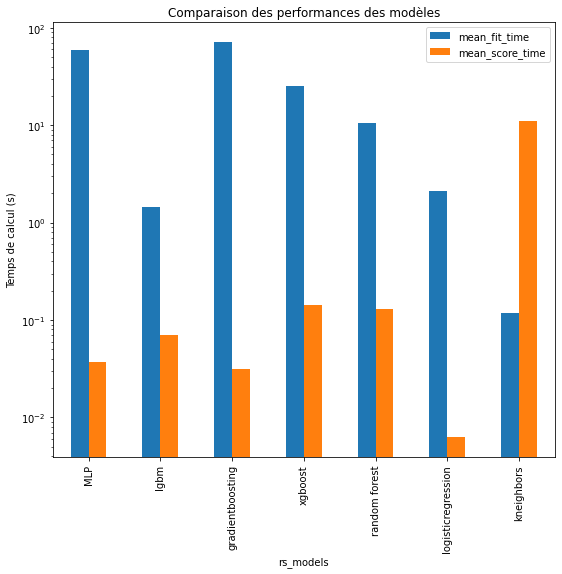

In [ ]:
# Performance_dimension_1: Score de prédiction
model_stat.plot(x="rs_models", y=["mean_fit_time", "mean_score_time"], kind="bar", figsize=(9, 8), )
plt.ylabel("Temps de calcul (s)")
plt.title("Comparaison des performances des modèles")
plt.yscale('log') 
plt.show()

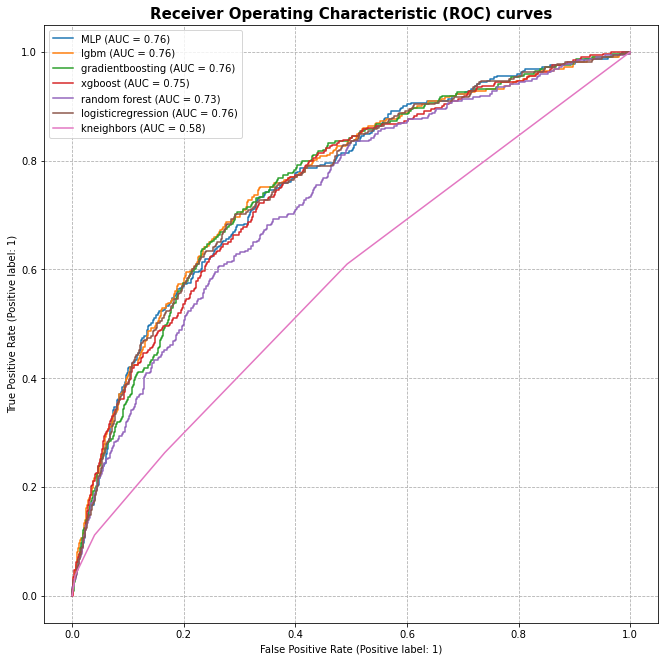

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 11))


for name, model in s_models.items(): # itération par paire 
    if name not in {"MLP": rs_mlp,
                    #"random forest": rs_rf,
                    "logisticregression": rs_logr,
                    "kneighbors": rs_knn}:
        RocCurveDisplay.from_estimator(
            model.best_estimator_, X_test, y_test, ax=ax, name=name)
        
    else :
        RocCurveDisplay.from_estimator(
        model.best_estimator_, X_test_scaled, y_test, ax=ax, name=name)
                
ax.set_title('Receiver Operating Characteristic (ROC) curves', fontsize=15, fontweight="bold")
ax.grid(linestyle='--')

plt.legend()
plt.show()

In [ ]:
list_rs_model = rs_model("roc_auc", param_mlp, param_lgbm, param_svm, param_gb, param_xgb, param_rf, param_logr, param_knn)

Récupération des données dans un tableau présentant le temps de calcul ainsi les roc_auc_score et f1_score correspondants

## Résolution du problème de déséquilibre des classes

### SMOTE (Synthetic Minority Over-sampling Technique) pour l'équilibre des données


In [ ]:
# pip install imbalanced-learn

In [ ]:
import sklearn
print(sklearn.__version__)

1.1.1


In [ ]:
import imblearn
print(imblearn.__version__)

0.9.1


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

   **Mise en place de l'oversampling sur les données et effet sur des données de classes déséquilibrées** 

Rappel : les proportions des classes sont les suivantes
0 (classe négative, qui ne sont pas en défaut de paiement) 91.93% et
1 (La classe en défaut de paiement): 8.07%.

In [ ]:
from collections import Counter
from numpy import where

In [ ]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
273828,1.0,0.0,1.0,2.0,270000.0,1078200.0,31653.0,900000.0,0.026392,-12043.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,83.0
206898,1.0,0.0,0.0,0.0,202500.0,270000.0,12717.0,270000.0,0.028663,-12760.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22.0
47543,0.0,1.0,0.0,1.0,247500.0,675000.0,28507.5,675000.0,0.007020,-12313.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22.0
50600,0.0,1.0,0.0,1.0,112500.0,360000.0,18000.0,360000.0,0.035792,-14574.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22.0
8874,0.0,0.0,0.0,0.0,112500.0,284400.0,13257.0,225000.0,0.028663,-12261.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91538,0.0,1.0,0.0,0.0,202500.0,422235.0,21555.0,364500.0,0.072508,-15292.0,...,1.0,0.03125,3.0,0.030592,0.0,0.0,0.0,0.0,0.0,96.0
223491,0.0,1.0,0.0,1.0,315000.0,781920.0,42547.5,675000.0,0.032561,-12118.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22.0
135823,0.0,1.0,0.0,2.0,562500.0,2575125.0,78205.5,2223000.0,0.006629,-13357.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22.0
115264,0.0,1.0,0.0,1.0,112500.0,594121.5,28710.0,472500.0,0.018634,-11431.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
# http://glemaitre.github.io/imbalanced-learn/generated/imblearn.over_sampling.SMOTE.html
# summarize class distribution
counter = np.bincount(y_train)
print('Forme du jeu de données original {} '.format(counter), "soit {}".format(counter/len(y_train)))

# transform the dataset
oversample = SMOTE(random_state=0, k_neighbors=7)
X_res_train, y_res_train = oversample.fit_resample(X_train, y_train) # X_p, y_p, oversampling variables
# summarize the new class distribution
counter =  np.bincount(y_res_train)

print("Forme du jeu de données rééchantillonné  {}".format(Counter(y_res_train)), "soit {}".format(counter/len(y_res_train)))

Forme du jeu de données original [14708  1292]  soit [0.91925 0.08075]
Forme du jeu de données rééchantillonné  Counter({0: 14708, 1: 14708}) soit [0.5 0.5]


In [ ]:
X_res_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,1.000000,0.000000,1.000000,2.000000,270000.000000,1.078200e+06,31653.000000,900000.000000,0.026392,-12043.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0
1,1.000000,0.000000,0.000000,0.000000,202500.000000,2.700000e+05,12717.000000,270000.000000,0.028663,-12760.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,0.000000,1.000000,0.000000,1.000000,247500.000000,6.750000e+05,28507.500000,675000.000000,0.007020,-12313.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,0.000000,1.000000,0.000000,1.000000,112500.000000,3.600000e+05,18000.000000,360000.000000,0.035792,-14574.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,0.000000,0.000000,0.000000,0.000000,112500.000000,2.844000e+05,13257.000000,225000.000000,0.028663,-12261.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29411,1.000000,0.000000,0.438342,0.561658,67500.000000,2.084738e+05,12273.169050,173956.561285,0.027555,-16647.984771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
29412,0.099038,0.000000,0.900962,0.198077,112500.000000,4.297025e+05,25460.190779,368913.455591,0.024677,-13460.394395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
29413,0.000000,0.431999,0.000000,0.431999,209159.923055,3.605398e+05,32839.241289,360539.820462,0.020878,-15533.547684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
29414,0.000000,0.193605,0.806395,0.000000,336325.130785,5.968952e+05,30845.238545,432575.521051,0.012788,-14579.312744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
# partitionnement des données de sorte à respecter le ratio TARGET (entre 0 et 1) et choix de X profil aléatoire
def train_dff_portion_(X, y, num_rows):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_rows, random_state=0, shuffle=True , stratify=y)
    del X_test, y_test
    
    return X_train, y_train

In [ ]:
# préparation de train_set et test_set


In [ ]:
X_res_train_scaled = scaler.fit_transform(X_res_train)

In [ ]:
cv = StratifiedKFold(5, shuffle=True, random_state=0) # utiliser à cause du jeu de données déséquilibré.
scoring = "roc_auc"

rs_mlp_s = RandomizedSearchCV(MLPClassifier(max_iter = 300), param_mlp, cv=cv, scoring=scoring)
rs_lgbm_s = RandomizedSearchCV(model_lgbm, param_lgbm, cv=cv, scoring=scoring)
rs_gb_s = RandomizedSearchCV(model_gb, param_gb, cv=cv, scoring=scoring)
rs_xgb_s = RandomizedSearchCV(model_xgb, param_xgb, cv=cv, scoring=scoring)
rs_rf_s = GridSearchCV(RandomForestClassifier(), param_rf, cv=cv, scoring=scoring)
rs_logr_s = RandomizedSearchCV(LogisticRegression(max_iter = 300, solver= 'saga'), param_logr, cv=cv, scoring=scoring)
rs_knn_s = RandomizedSearchCV(KNeighborsClassifier(), param_knn, cv=cv, scoring=scoring)


In [ ]:
rs_knn_s.fit(X_res_train_scaled,  y_res_train)
rs_mlp_s.fit(X_res_train_scaled,  y_res_train)
rs_logr_s.fit(X_res_train_scaled,  y_res_train)

rs_rf_s.fit(X_res_train,  y_res_train)
rs_lgbm_s.fit(X_res_train,  y_res_train)
rs_gb_s.fit(X_res_train,  y_res_train)
rs_xgb_s.fit(X_res_train,  y_res_train)

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interac...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'eta': [0.01, 0.1, 1],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5, 7, 9]},
                   scoring='roc_auc')

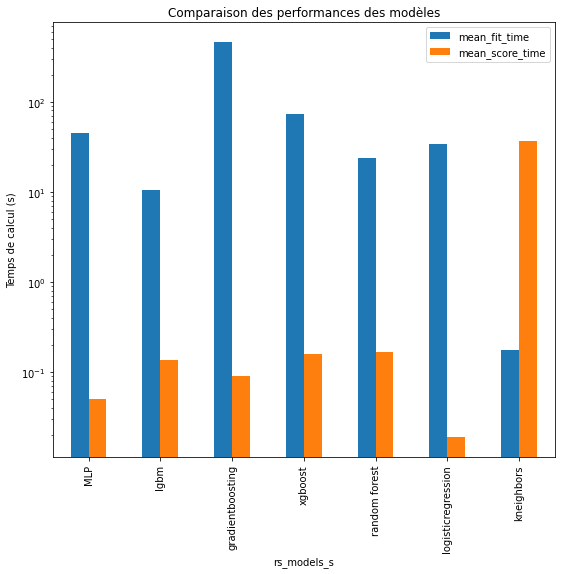

In [ ]:
s_models_s = {"MLP": rs_mlp_s,
              "lgbm": rs_lgbm_s,
              "gradientboosting": rs_gb_s,
              "xgboost": rs_xgb_s,
              "random forest": rs_rf_s,
              "logisticregression": rs_logr_s,
              "kneighbors": rs_knn_s
}

model_stat = pd.DataFrame(index=df_gb.columns)
for name, rs_model in s_models_s.items():
    df_model = pd.DataFrame(rs_model.cv_results_)
    df_model = (df_model[df_model.rank_test_score == 1][["mean_fit_time", "mean_score_time"]].T).values
    model_stat[name] = df_model
del df_model

# mise en place de l'index
model_stat = model_stat.T
model_stat["rs_models_s"] = model_stat.index

# Performance dans les temps d'apprentissage et de prédiction
model_stat.plot(x="rs_models_s", y=["mean_fit_time", "mean_score_time"], kind="bar", figsize=(9, 8),)
plt.ylabel("Temps de calcul (s)")
plt.title("Comparaison des performances des modèles")
plt.yscale('log') 
plt.show()

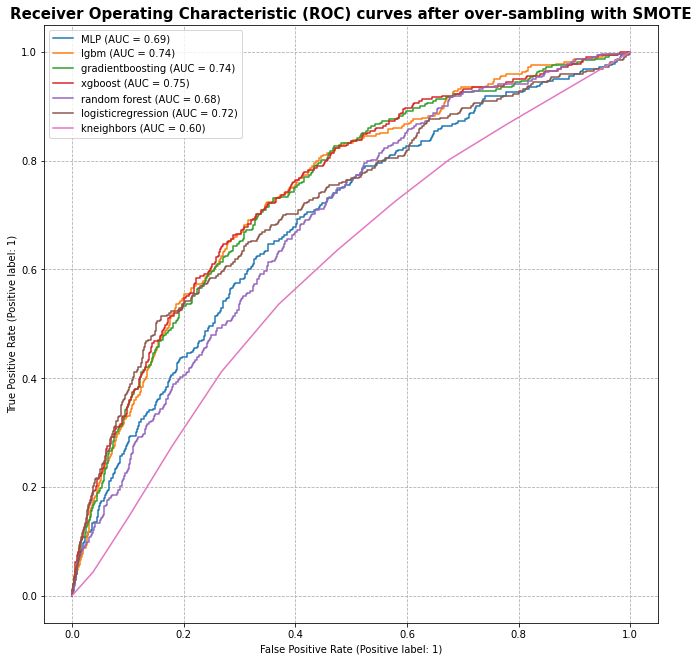

In [ ]:
# courbe ROC dans le cas de oversampling des données avec SMOTE
fig, ax = plt.subplots(1, figsize=(11, 11))

for name, model in s_models_s.items(): # itération par paire 
    if name not in {"MLP": rs_mlp_s,
                    #"random forest": rs_rf_s,
                    "logisticregression": rs_logr_s,
                    "kneighbors": rs_knn_s}:
        RocCurveDisplay.from_estimator(
            model.best_estimator_, X_test, y_test, ax=ax, name=name)
        
    else :
        RocCurveDisplay.from_estimator(
        model.best_estimator_, X_test_scaled, y_test, ax=ax, name=name)
                
ax.set_title('Receiver Operating Characteristic (ROC) curves after over-sambling with SMOTE', fontsize=15, fontweight="bold")
ax.grid(linestyle='--')

plt.legend()
plt.show()

Rappel par convention “Individus minoritaires = individus positifs”

impacts de données déséquilibrées sur la performance de prédiction des algorithmes de machine Learning:
https://kobia.fr/imbalanced-data-et-machine-learning/ 

### Optimisation du auc du roc par ajustement des poids des classes via class_weight

Parmi les classificateurs que nous étudions seuls lgbm, randomforest et logisticregression peuvent accepter l'argument class_weight

In [ ]:
model_lgbm_w = LGBMClassifier(class_weight="balanced") #
model_rf_w = RandomForestClassifier(class_weight="balanced")  #
model_logr_w = LogisticRegression(max_iter = 300, solver= 'saga',
                                  class_weight="balanced") #

In [ ]:
cv = StratifiedKFold(5, shuffle=True, random_state=0) # utiliser à cause du jeu de données déséquilibré.
scoring = "roc_auc"

rs_lgbm_w = RandomizedSearchCV(model_lgbm_w, param_lgbm, cv=cv, scoring=scoring)
gs_rf_w = GridSearchCV(model_rf_w, param_rf, cv=cv, scoring=scoring)
rs_logr_w = RandomizedSearchCV(model_logr_w, param_logr, cv=cv, scoring=scoring)

In [ ]:
gs_rf_w.fit(X_train, y_train)
rs_logr_w.fit(X_train_scaled, y_train)
rs_lgbm_w.fit(X_train, y_train)

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LGBMClassifier(class_weight='balanced'),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'num_leaves': [31, 127],
                                        'reg_alpha': [0.1, 0.5]},
                   scoring='roc_auc')

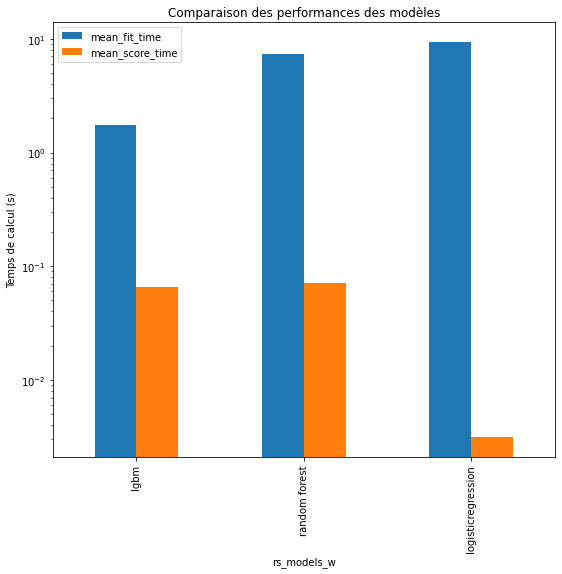

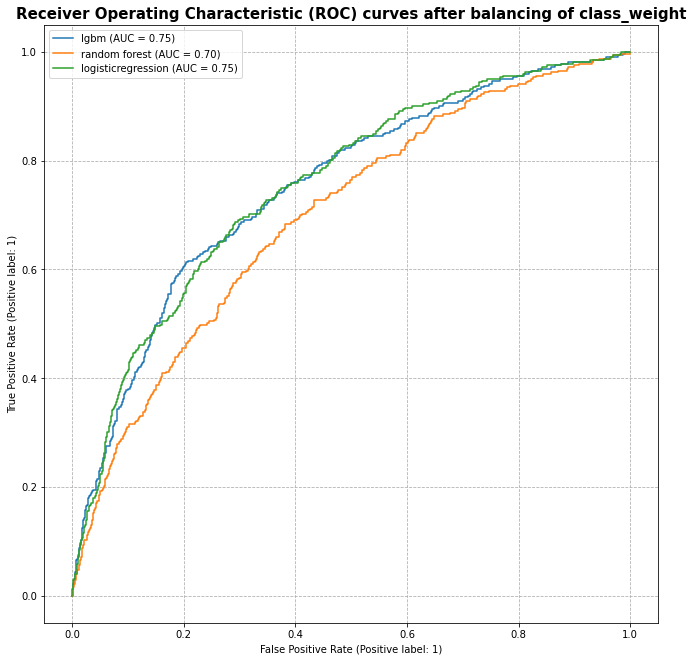

In [ ]:
s_models_w = {
            "lgbm": rs_lgbm_w,
            "random forest": gs_rf_w,
            "logisticregression": rs_logr_w,
              }

# création de dataframe contenant les temps d'apprentissage et de prédiction
model_stat = pd.DataFrame(index=df_gb.columns)
for name, rs_model in s_models_w.items():
    df_model = pd.DataFrame(rs_model.cv_results_)
    df_model = (df_model[df_model.rank_test_score == 1][["mean_fit_time", "mean_score_time"]].T).values
    model_stat[name] = df_model
del df_model

# mise en place de l'index
model_stat = model_stat.T
model_stat["rs_models_w"] = model_stat.index

# Performance dans les temps d'apprentissage et de prédiction
model_stat.plot(x="rs_models_w", y=["mean_fit_time", "mean_score_time"], kind="bar", figsize=(9, 8),)
plt.ylabel("Temps de calcul (s)")
plt.title("Comparaison des performances des modèles")
plt.yscale('log') 
plt.show()

# courbe ROC dans le cas de oversampling des données avec SMOTE
fig, ax = plt.subplots(1, figsize=(11, 11))

for name, model in s_models_w.items(): # itération par paire 
    if name not in {#"MLP": rs_mlp_w,
                    #"random forest": gs_rf_w,
                    "logisticregression": rs_logr_w, #"kneighbors": rs_knn_w
    }:
        RocCurveDisplay.from_estimator(
            model.best_estimator_, X_test, y_test, ax=ax, name=name)
        
    else :
        RocCurveDisplay.from_estimator(
            model.best_estimator_, X_test_scaled, y_test, ax=ax, name=name)
                
ax.set_title('Receiver Operating Characteristic (ROC) curves after balancing of class_weight', fontsize=15, fontweight="bold")
ax.grid(linestyle='--')

plt.legend()
plt.show()

In [ ]:
# faisons varier lors de la recherche aautomatique de meilleures hyperparamètres le class_weight

model_lgbm_ = LGBMClassifier() #
model_rf_ = RandomForestClassifier()  #
model_logr_ = LogisticRegression(max_iter = 300, solver= 'saga') #

cv = StratifiedKFold(5, shuffle=True, random_state=0) # utiliser à cause du jeu de données déséquilibré.
scoring = "roc_auc"

param_lgbm_ = {'num_leaves': [31, 127],
               'reg_alpha': [0.1, 0.5],
               'learning_rate': [0.001, 0.01, 0.1],
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
               "class_weight" : [{0: 1, 1: w} for w in np.arange(1, 10, 1)]}
param_rf_ = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
             "class_weight" : [{0: 1, 1: w} for w in np.arange(1, 10, 1)]}

param_logr_ = {'C': [0.001, 0.01, 0.1, 1.0, 10],
                 'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
                 'max_iter': [100, 200, 300],
                  "class_weight" : [{0: 1, 1: w} for w in np.arange(1, 10, 1)]}

rs_lgbm_w_ = RandomizedSearchCV(model_lgbm_, param_lgbm_, cv=cv, scoring=scoring)
gs_rf_w_ = GridSearchCV(model_rf_, param_rf_, cv=cv, scoring=scoring)
rs_logr_w_ = RandomizedSearchCV(model_logr_, param_logr_, cv=cv, scoring=scoring)

gs_rf_w_.fit(X_train, y_train)
rs_logr_w_.fit(X_train_scaled, y_train)
rs_lgbm_w_.fit(X_train, y_train)

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LGBMClassifier(),
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3},
                                                         {0: 1, 1: 4},
                                                         {0: 1, 1: 5},
                                                         {0: 1, 1: 6},
                                                         {0: 1, 1: 7},
                                                         {0: 1, 1: 8},
                                                         {0: 1, 1: 9}],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'num_leaves': [31, 127],
                                        'reg_alpha': [0.1, 0.5]},
                   scoring='roc_auc')

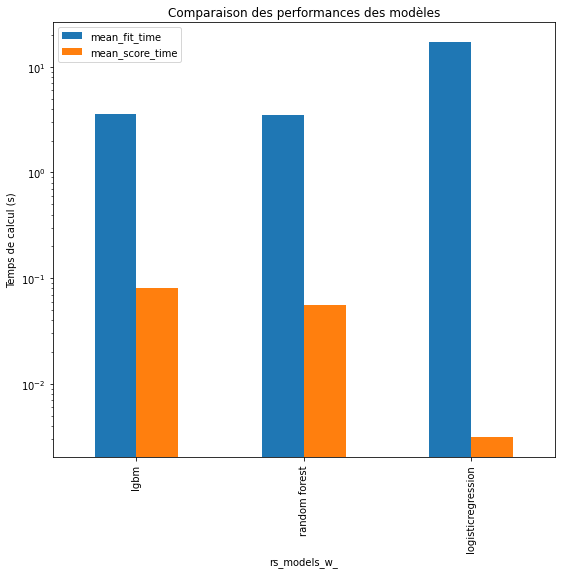

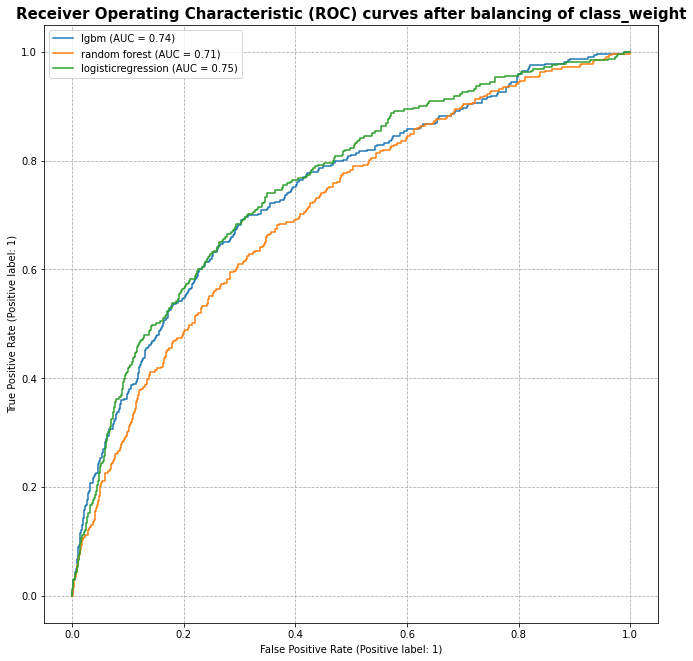

In [ ]:
s_models_w_ = {
            "lgbm": rs_lgbm_w_,
            "random forest": gs_rf_w_,
            "logisticregression": rs_logr_w_,
              }

# création de dataframe contenant les temps d'apprentissage et de prédiction
model_stat = pd.DataFrame(index=df_gb.columns)
for name, rs_model in s_models_w_.items():
    df_model = pd.DataFrame(rs_model.cv_results_)
    df_model = (df_model[df_model.rank_test_score == 1][["mean_fit_time", "mean_score_time"]].T).values
    model_stat[name] = df_model
del df_model


# mise en place de l'index
model_stat = model_stat.T
model_stat["rs_models_w_"] = model_stat.index

# Performance dans les temps d'apprentissage et de prédiction
model_stat.plot(x="rs_models_w_", y=["mean_fit_time", "mean_score_time"], kind="bar", figsize=(9, 8),)
plt.ylabel("Temps de calcul (s)")
plt.title("Comparaison des performances des modèles")
plt.yscale('log') 
plt.show()

# courbe ROC dans le cas de oversampling des données avec SMOTE
fig, ax = plt.subplots(1, figsize=(11, 11))

for name, model in s_models_w_.items(): # itération par paire 
    if name not in {"logisticregression": rs_logr_w_}:
        RocCurveDisplay.from_estimator(
            model.best_estimator_, X_test, y_test, ax=ax, name=name)
        
    else :
        RocCurveDisplay.from_estimator(
            model.best_estimator_, X_test_scaled, y_test, ax=ax, name=name)
                
ax.set_title('Receiver Operating Characteristic (ROC) curves after balancing of class_weight', fontsize=15, fontweight="bold")
ax.grid(linestyle='--')

plt.legend()
plt.show()

**Fine Tunning des hyperparamètres du modèle choisi**

L'équilibre des classes avec l'argument class_weight = "balanced" : c'est à dire un ajustement automatique des pondérations inversement proportionnelles aux fréquences de classe dans les données d'entrée.
Elle est décrite selon : n_samples / (n_classes * np.bincount(y))


Dans les cas lgbm est le modèle le mieux stable.
Mais prédisons sur l'ensemble du dataset pour voir lequel de lgbm et logreg (avec la méthode de pondération des classes = méthode banlanced) s'adapte mieux aux données 

In [ ]:
print("Les meilleurs paramètres de rs_lgbm_w : ", rs_lgbm_w.best_params_)
print("Les meilleurs paramètres de rs_logr_w : ", rs_logr_w.best_params_)

Les meilleurs paramètres de rs_lgbm_w :  {'reg_alpha': 0.1, 'num_leaves': 31, 'max_depth': 3, 'learning_rate': 0.1}
Les meilleurs paramètres de rs_logr_w :  {'solver': 'sag', 'max_iter': 100, 'C': 0.001}


In [ ]:
# création de modèles dans un pipeline de prédiction
clf_lgbm = LGBMClassifier(reg_alpha=0.1, num_leaves=31, max_depth=3, learning_rate=0.1, class_weight="balanced")
clf_logreg = make_pipeline(StandardScaler(), LogisticRegression(C=0.001, max_iter = 100, solver='sag', class_weight="balanced"))

In [ ]:
# avec rs_lgbm_w
pd.DataFrame(rs_lgbm_w.cv_results_).sort_values(by='rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,param_num_leaves,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.734429,0.095533,0.065610,6.249619e-03,0.1,31,3,0.1,"{'reg_alpha': 0.1, 'num_leaves': 31, 'max_dept...",0.740530,0.736595,0.733706,0.742702,0.724119,0.735530,0.006498,1
2,2.271754,0.109626,0.065610,6.248379e-03,0.5,127,4,0.1,"{'reg_alpha': 0.5, 'num_leaves': 127, 'max_dep...",0.736532,0.725793,0.737566,0.736198,0.718878,0.730993,0.007413,2
3,4.159641,0.151333,0.074983,6.248236e-03,0.5,31,7,0.1,"{'reg_alpha': 0.5, 'num_leaves': 31, 'max_dept...",0.732112,0.714317,0.719945,0.729210,0.708991,0.720915,0.008727,3
4,5.743772,0.240527,0.074983,6.248498e-03,0.1,31,9,0.01,"{'reg_alpha': 0.1, 'num_leaves': 31, 'max_dept...",0.727645,0.714680,0.731197,0.719360,0.695980,0.717772,0.012367,4
6,4.894842,0.121182,0.078105,7.539457e-07,0.1,31,6,0.01,"{'reg_alpha': 0.1, 'num_leaves': 31, 'max_dept...",0.724612,0.712860,0.730680,0.720342,0.695029,0.716705,0.012294,5


In [ ]:
# avec rs_logr_w
pd.DataFrame(rs_logr_w.cv_results_).sort_values(by='rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,9.364593,1.276872,0.003124,0.006248,sag,100,0.001,"{'solver': 'sag', 'max_iter': 100, 'C': 0.001}",0.731549,0.727355,0.732001,0.731858,0.717749,0.728102,0.005458,1
4,2.496050,0.187251,0.006116,0.007494,newton-cg,100,0.001,"{'solver': 'newton-cg', 'max_iter': 100, 'C': ...",0.731595,0.727346,0.732006,0.731871,0.717628,0.728089,0.005512,2
7,2.422426,0.170147,0.009373,0.007653,newton-cg,300,0.001,"{'solver': 'newton-cg', 'max_iter': 300, 'C': ...",0.731595,0.727346,0.732006,0.731871,0.717628,0.728089,0.005512,2
1,11.047333,0.492548,0.009365,0.007646,sag,100,1.0,"{'solver': 'sag', 'max_iter': 100, 'C': 1.0}",0.721137,0.713389,0.719042,0.716048,0.704412,0.714806,0.005824,4
5,33.983041,1.069430,0.015623,0.000012,saga,300,0.1,"{'solver': 'saga', 'max_iter': 300, 'C': 0.1}",0.720361,0.710835,0.717998,0.714770,0.702409,0.713274,0.006305,5


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Rappelons nous 20000 profils ont été utilisés pour nos démarches de train_test par son soucis de temps travail sur les recherches d'hyperparamètres nous allons donc utiliser ici les données restantes pour tester la performance de nos modèles nos modèles de lgbm et logreg sur des données qui leur sont inconnus.

In [ ]:
# partitionnement des données de sorte à respecter le ratio TARGET (entre 0 et 1) et choix de X profil aléatoire
def train_dff_portion_(num_rows):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_rows, random_state=0, shuffle=True , stratify=y)
   
    return X_test, y_test

In [ ]:
Xi, yi = train_dff_portion_(20000)

In [ ]:
print(len(Xi))
print(len(yi))

287507
287507


In [ ]:
# fonction d'évaluation de classification binaire
# affichage des métriques precision, recall, f1-score, support
dict_ = {"lgbm" : rs_lgbm_w.best_estimator_,
         "logreg" : rs_logr_w.best_estimator_   
         }

target_names = ['class 0', 'class 1']
for name, model in dict_.items():
    if name == "lgbm":
        y_pred = model.predict(Xi)
        print("-----Evaluation du modèle {}-----".format(name), "\n", classification_report(yi, y_pred, target_names=target_names))
    else:
        y_pred = model.predict(scaler.fit_transform(Xi))
        print("-----Evaluation du modèle {}-----".format(name), "\n", classification_report(yi, y_pred, target_names=target_names))

-----Evaluation du modèle lgbm----- 
               precision    recall  f1-score   support

     class 0       0.96      0.76      0.85    264297
     class 1       0.18      0.60      0.28     23210

    accuracy                           0.74    287507
   macro avg       0.57      0.68      0.56    287507
weighted avg       0.89      0.74      0.80    287507

-----Evaluation du modèle logreg----- 
               precision    recall  f1-score   support

     class 0       0.96      0.72      0.82    264297
     class 1       0.17      0.64      0.27     23210

    accuracy                           0.72    287507
   macro avg       0.56      0.68      0.54    287507
weighted avg       0.89      0.72      0.78    287507



In [ ]:
roc_auc_score(yi, rs_lgbm_w.best_estimator_.predict_proba(Xi)[:,1])

0.7462145466182905

In [ ]:
roc_auc_score(yi, rs_logr_w.best_estimator_.predict_proba(scaler.fit_transform(Xi))[:,1])

0.7412030510497019

Sur l'ensemble des données on se rend compte que f1_score de lgbm est plus élevé que celui de logreg et qu'ils ont pratiquement les mêmes auc_roc même si lgbm est à 0.75 contre 0.74.
lgbm est bien meilleur en terme de perfomance auc_score temps.

Le modèle final est **clf_lgbm**

In [ ]:
clf_lgbm

LGBMClassifier(class_weight='balanced', max_depth=3, reg_alpha=0.1)

In [ ]:
clf_lgbm_ = rs_lgbm_w.best_estimator_
clf_lgbm_

LGBMClassifier(class_weight='balanced', max_depth=3, reg_alpha=0.1)

In [ ]:
# mise en place de la matrice de confusion
y_pred = clf_lgbm_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2772,  905],
       [ 116,  207]], dtype=int64)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay 

<Figure size 720x720 with 0 Axes>

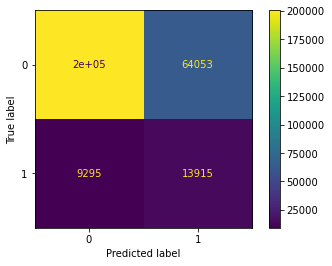

In [ ]:
# prédiction sur l'ensemble des données
y_pred_ = clf_lgbm_.predict(Xi)
cm_ = confusion_matrix(yi, y_pred_)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

On remarque 64053 FP (un manque à gagner) et 9295 FN qui constitue une perte sur le capital investi.

In [ ]:
fbeta_score(y_test , y_pred, average=None, beta=0.5)

array([0.91010572, 0.21693565])

In [ ]:
fbeta_score(y_test , y_pred, average=None, beta=2)

array([0.78767902, 0.43053245])

fbeta_score augmente avec le beta

**Mise en place d'un fine-tuning des hyperparamètres du modèle choisi**

In [ ]:
# nouveau paramètre du modèle
param_model = {"max_iter": [250, 275, 300, 325, 350],
               "learning_rate_init": [0.0005, 0.001, 0.002, 0.0005]
              }
scoring = "roc_auc"
cv =  StratifiedKFold(5, shuffle=True, random_state=0)
grid_search = GridSearchCV(MLPClassifier(solver='adam', activation='relu', random_state=0), param_model, cv=cv, scoring=scoring) 

In [ ]:
# Entrainement sur les données issues de l'oversampling avec SMOTE
grid_search.fit(X_res_train_scaled, y_res_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=MLPClassifier(random_state=0),
             param_grid={'learning_rate_init': [0.0005, 0.001, 0.002, 0.0005],
                         'max_iter': [250, 275, 300, 325, 350]},
             scoring='roc_auc')

Encore une fois le meilleur modèle retenu est pas assez généraliste sur sur toute l'étendue des données avec une AUC de ROC près de 0.75

Du moins, s'il est vrai qu'un faux négatif est environ 10 fois plus coûteux qu'un faux postif alors il est clair que  9285 faux négatifs est bien plus coûteux que 64053 faux positifs. 

De ce fait, la mise en place d'une fonction coût métier qui pourrait attribuer plus de poids à la minimisation des Faux négatifs s'avère nécessaire.